In [1]:
#import python libraries
import torch
import numpy as np
import torchaudio
import json

#Visualization libraries
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import colors

#Write Libraries
from pathlib import Path
import pandas as pd

In [2]:
#Configure open paths
open_folder = "exports"
open_path = "{}\\{}\\".format(str(Path.cwd()), open_folder)

In [3]:
#Open wave simulation metadata
with open(open_path+'data1 metadata.json') as f:
    u_metadata=json.load(f)
u_metadata

{'dx': 0.5, 'dy': 0.5, 'dt': 0.006666666666666667, 'c': 30, 'N_t': 2400}

In [4]:
#Open numpy array to torch tensor
u_tensor = torch.load(open_path + 'data1.pt')
u_tensor

tensor([[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0

In [5]:
#Get dimensions
N_t = u_tensor.shape[0]
N_x = u_tensor.shape[1]
N_y = u_tensor.shape[2]
t_array = np.linspace(0, N_t*u_metadata['dt'], N_t)
t_array

array([0.00000000e+00, 6.66944329e-03, 1.33388866e-02, ...,
       1.59999944e+01, 1.60066639e+01, 1.60133333e+01])

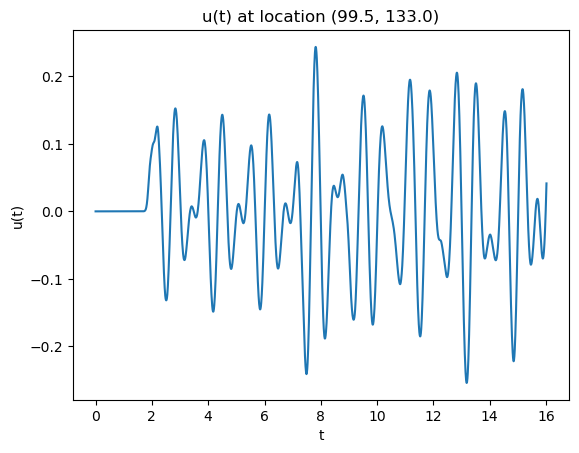

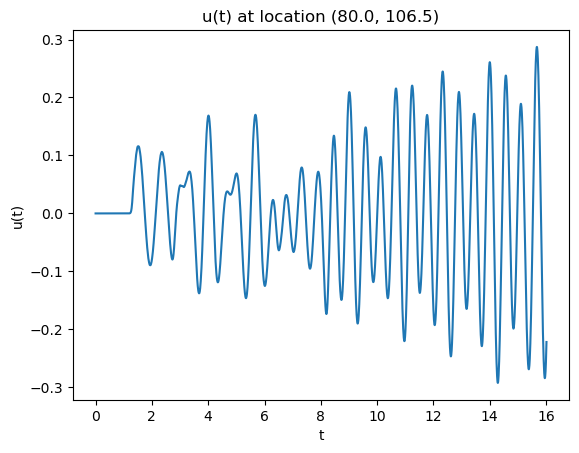

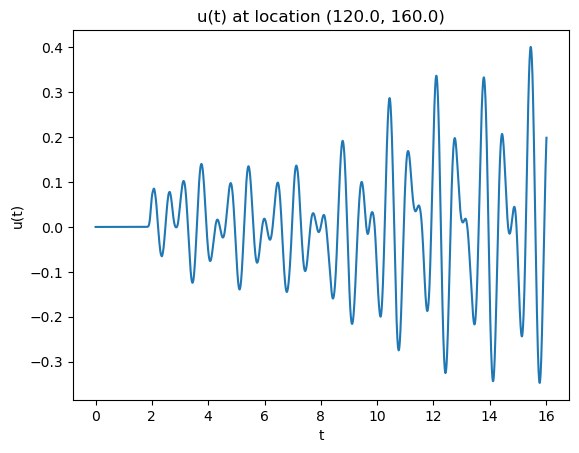

In [6]:
#Extract the simulation signal at different locations using a list of coordinates
for coordinate in [(int((1/3+1/2)/2*N_x), int((1/3+1/2)/2*N_y)),
                   (int((1/3)*N_x), int((1/3)*N_y)),
                    (int((1/2)*N_x), int((1/2)*N_y))]:

    #Extract signal
    u_loc = u_tensor[:,coordinate[0], coordinate[1]]
    #Plot signal
    plt.figure()
    plt.plot(t_array, u_loc.cpu().numpy())
    plt.xlabel('t')
    plt.ylabel('u(t)')
    plt.title('u(t) at location ({}, {})'.format(u_metadata['dx']*coordinate[0],
                                               u_metadata['dy']*coordinate[1]))

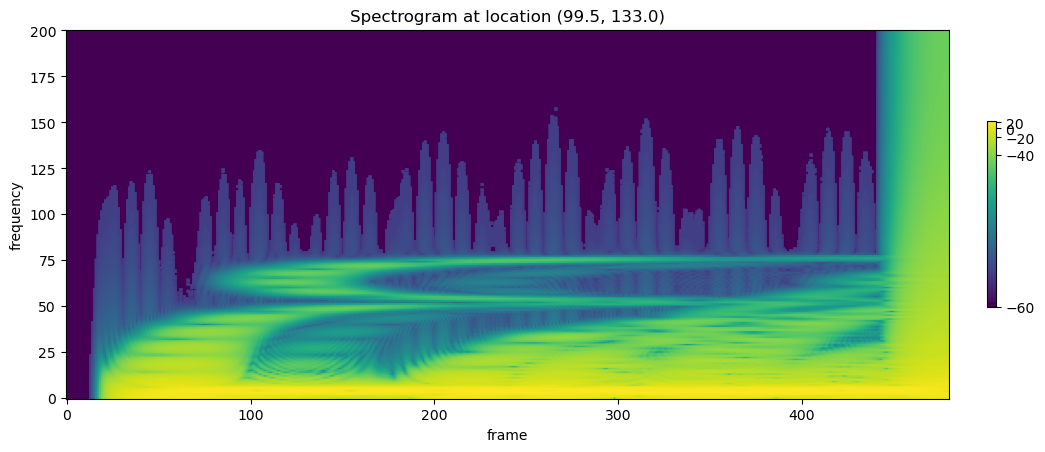

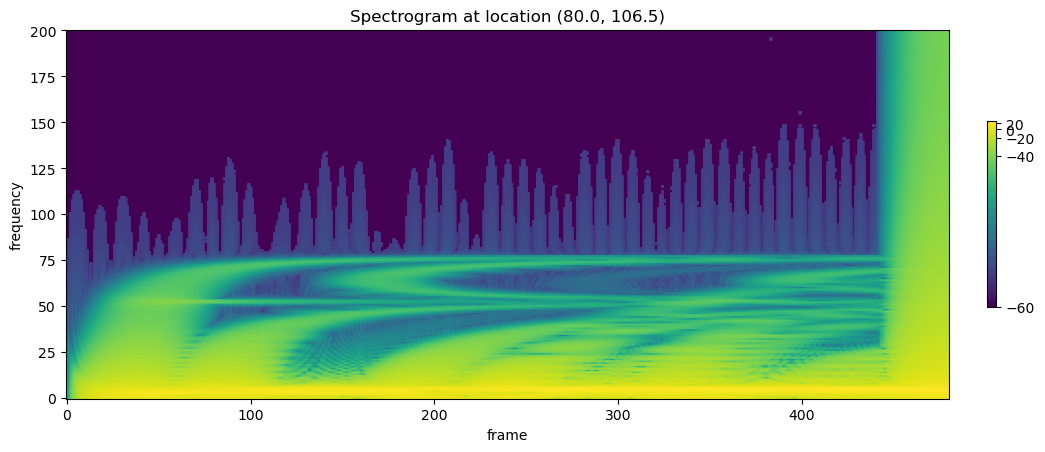

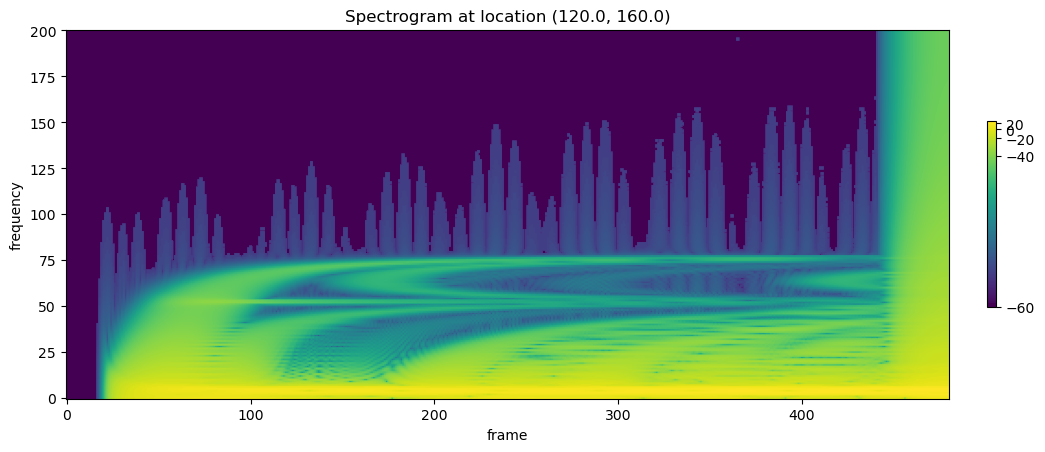

In [7]:
#Initialize Spectrogram
transform = torchaudio.transforms.Spectrogram(n_fft=400, hop_length=5)

#Extract the simulation signal at different locations using a list of coordinates
for coordinate in [(int((1/3+1/2)/2*N_x), int((1/3+1/2)/2*N_y)),
                   (int((1/3)*N_x), int((1/3)*N_y)),
                    (int((1/2)*N_x), int((1/2)*N_y))]:

    #Extract signal
    u_loc = u_tensor[:,coordinate[0], coordinate[1]] 
    #Get Spectrogram
    spectrogram = transform(u_loc.cpu())
    #log shift factor to avoid getting log(0) in power transform
    log_shift = 1e-5
    # Get the power spectral density shifted by a factor
    spectrogram_power = 10 * np.log10(spectrogram.cpu()+log_shift)
    
    #Initialize plot
    plt.figure(figsize=(12,10))
    #Plot only the lower frequencies of the spectrogram
    im = plt.imshow(spectrogram_power.type(torch.double).cpu(), origin="lower", norm=colors.PowerNorm(gamma=0.1))
    plt.colorbar(im, fraction=0.01, pad=0.04)
    plt.xlabel('frame')
    plt.ylabel('frequency')
    plt.title('Spectrogram at location ({}, {})'.format(u_metadata['dx']*coordinate[0],
                                               u_metadata['dy']*coordinate[1]))